### Basic working of DT

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree

In [4]:
iris_data = load_iris()

In [11]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
classification_tree = tree.DecisionTreeClassifier()

In [12]:
classification_tree = classification_tree.fit(iris_data.data, iris_data.target)

In [21]:
import graphviz

dot_data = tree.export_graphviz( classification_tree, out_file=None,
                                 feature_names = iris_data.feature_names,
                                 class_names = iris_data.target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

### Decision Tree Classifier for House Price Prediction

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('melb_data.csv')

#### EDA

In [5]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
data.shape

(13580, 21)

In [8]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
data = data.dropna(axis=0, how='any')

In [12]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
data.shape

(6196, 21)

In [15]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


#### DT

In [16]:
y = data['Price']

In [17]:
x = data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]

In [21]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [81]:
model = DecisionTreeRegressor()
model.fit(x,y)

DecisionTreeRegressor()

In [29]:
predictions = model.predict(x)

In [32]:
mean_absolute_error(y,predictions)

1115.7467183128902

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_x,val_x,train_y,val_y = train_test_split(x,y,random_state=2020)

In [82]:
dt_model = model.fit(train_x,train_y)

In [83]:
pred = dt_model.predict(val_x)

In [84]:
mean_absolute_error(val_y,pred)

254865.07876049064

In [85]:
from sklearn import tree
from matplotlib import pyplot as plt

In [75]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_0 <= 3.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 89.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- value: [392505.38]
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- value: [607199.35]
|   |   |--- feature_2 >  89.50
|   |   |   |--- feature_3 <= -37.74
|   |   |   |   |--- value: [840854.33]
|   |   |   |--- feature_3 >  -37.74
|   |   |   |   |--- value: [540905.63]
|   |--- feature_0 >  2.50
|   |   |--- feature_3 <= -37.75
|   |   |   |--- feature_4 <= 144.89
|   |   |   |   |--- value: [788205.02]
|   |   |   |--- feature_4 >  144.89
|   |   |   |   |--- value: [1309614.09]
|   |   |--- feature_3 >  -37.75
|   |   |   |--- feature_3 <= -37.72
|   |   |   |   |--- value: [805506.64]
|   |   |   |--- feature_3 >  -37.72
|   |   |   |   |--- value: [624544.44]
|--- feature_0 >  3.50
|   |--- feature_3 <= -37.75
|   |   |--- feature_2 <= 1274.50
|   |   |   |--- feature_4 <= 144.90
|   |   |   |   |--- value: [1093477.40]
|   |   |   |---

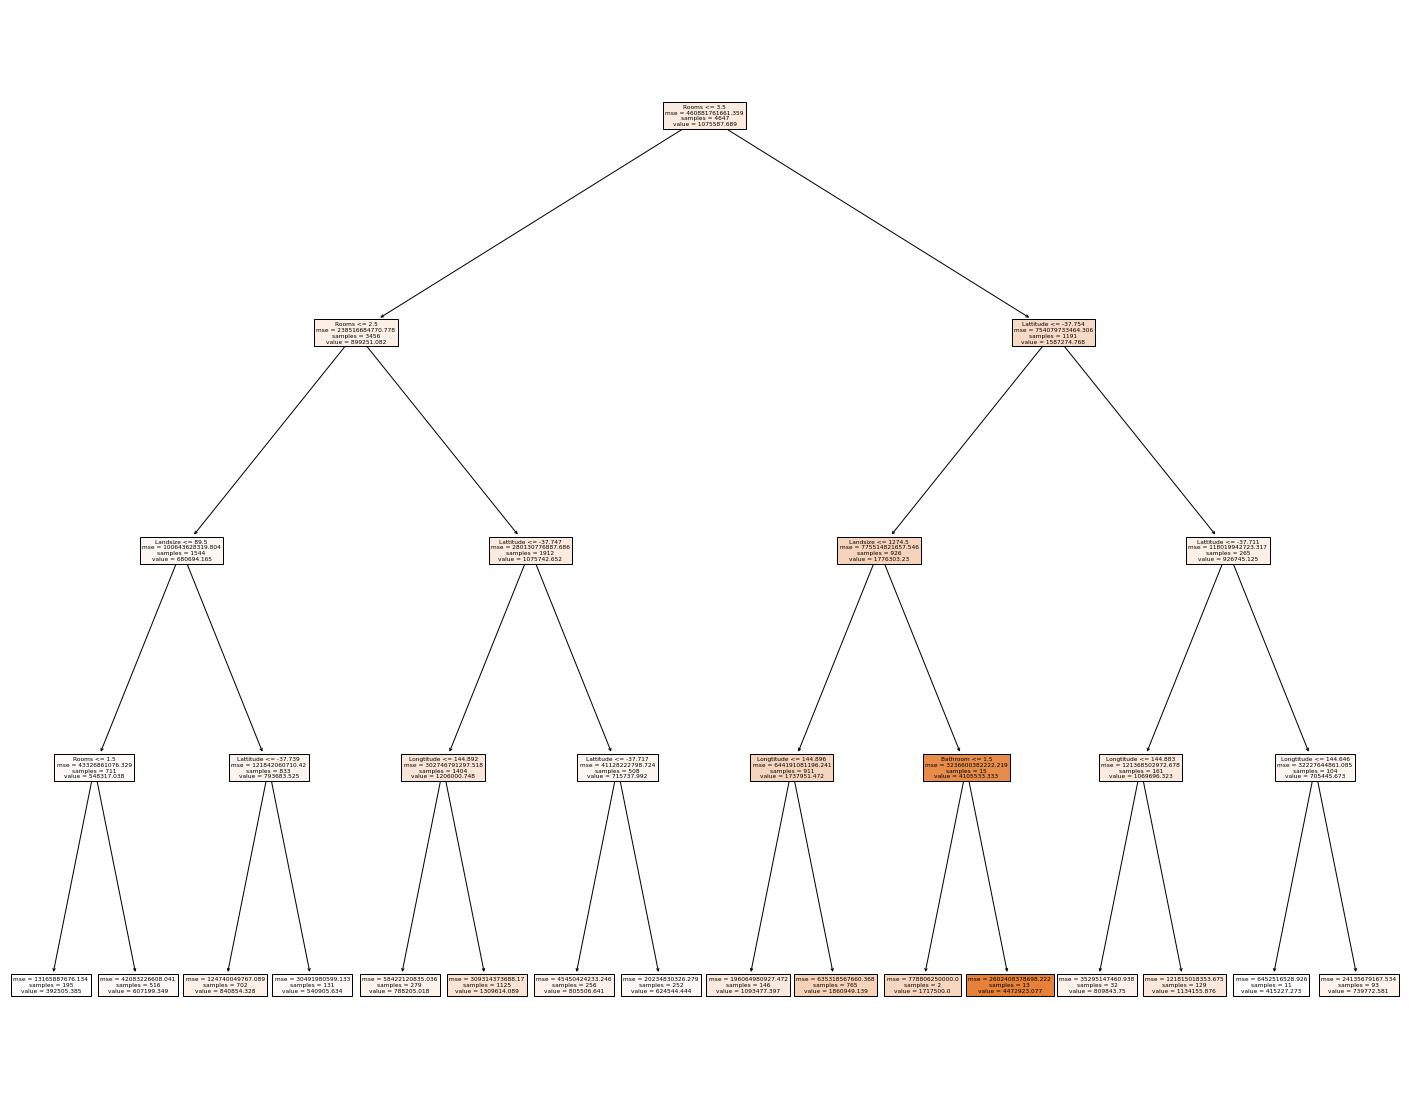

In [76]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, feature_names=train_x.columns, filled=True)

In [86]:
import graphviz

In [87]:
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                                feature_names=train_x.columns,  
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render("melbourn_housing")

'melbourn_housing.pdf'